In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F
import skimage

In [0]:
# referans: https://github.com/SurhanZahid/Fashion-MNIST-Classifier-Pytorch/blob/master/index.py

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                             ])

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:05, 5225421.80it/s]                              


Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 35070.60it/s]                           
0it [00:00, ?it/s]

Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:02, 1523670.41it/s]                            
0it [00:00, ?it/s]

Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 12200.33it/s]            

Extracting F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
# Based on: https://github.com/L1aoXingyu/pytorch-beginner/blob/master/08-AutoEncoder/conv_autoencoder.py

def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

class BizimleDegilsinNet(torch.nn.Module):
  def __init__(self):
    super(BizimleDegilsinNet, self).__init__()
    
    self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2), 
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1) 
        )
    
    self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  
            nn.Tanh()
        ) 

  def forward(self, x):
    x = self.encoder(x)

    x = self.decoder(x)
    return x

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


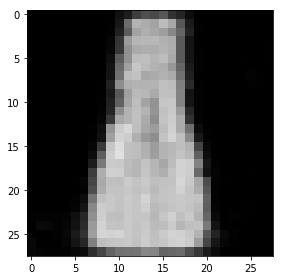

In [0]:
total_epoch = 5
bizimle_degilsin_net = BizimleDegilsinNet()

bizimle_degilsin_net = bizimle_degilsin_net.cuda()

criterion = torch.nn.MSELoss(reduce='mean')
optimizer = torch.optim.Adam(bizimle_degilsin_net.parameters(), lr=0.001)

for epoch in range(total_epoch):
  cikti = None
  for batch, _ in trainloader:

    batch = batch.cuda()

    optimizer.zero_grad()

    cikti = bizimle_degilsin_net(batch)

    loss = criterion(cikti, batch)

    loss.backward()

    optimizer.step()
    
  skimage.io.imshow(to_img(cikti[0]).squeeze().detach().cpu().numpy())

  print('Epoch: {}'.format(epoch))

In [0]:
imge, _ = next(iter(testloader))

imge = imge.cuda()

with torch.no_grad():
    cikti_test = bizimle_degilsin_net(imge)

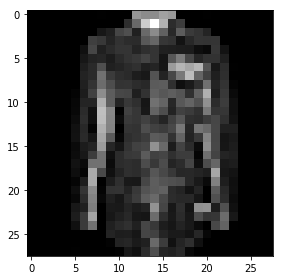

In [0]:
skimage.io.imshow(to_img(imge).squeeze().cpu().numpy()) # Orjinal imge  

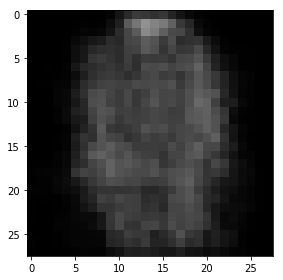

In [0]:
skimage.io.imshow(to_img(cikti_test).squeeze().cpu().numpy()) # Bizimle degilsin imgesi